In [2]:
import os
import settings
import pandas as pd
import numpy as np

In [3]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all.xls"), encoding="ISO-8859-1")
    df = df.reset_index()
    return df

In [4]:
def add_long_transcripts(df):
    '''
    Adds transcripts for 4 talks whose transcripts exceed max csv single cell capacity of 32767 characters
    '''
    long_transcripts = {354: 'dan_gilbert_researches_happiness.txt', \
                        2441: 'elon_musk_the_future_we_re_building_and_boring.txt', \
                        2421: 'gretchen_carlson_david_brooks_political_common_ground_in_a_polarized_united_states.txt', \
                        2387: 'yuval_noah_harari_nationalism_vs_globalism_the_new_political_divide.txt'}
    for k, v in long_transcripts.items():
        with open(os.path.join(settings.DATA_DIR, v)) as file:
            data = file.read()
            data = data.replace('\t', '')
            data = data.replace('\n', '')
            df.at[k, 'transcript'] = data
    return df

In [5]:
df = read_data()
df = add_long_transcripts(df)

The long transcript has been added to the appropriate row

In [6]:
df['transcript'].iloc[354]

'"We all make decisions every day; we want to know what the right thing is to do in domains from the financial to the gastronomic to the professional to the romantic. And surely, if somebody could really tell us how to do exactly the right thing at all possible times, that would be a tremendous gift.It turns out that, in fact, the world was given this gift in 1738 by a Dutch polymath named Daniel Bernoulli. And what I want to talk to you about today is what that gift is, and I also want to explain to you why it is that it hasn\'t made a damn bit of difference.Now, this is Bernoulli\'s gift. This is a direct quote. And if it looks like Greek to you, it\'s because, well, it\'s Greek. But the simple English translation â€” much less precise, but it captures the gist of what Bernoulli had to say â€” was this: The expected value of any of our actions â€” that is, the goodness that we can count on getting â€” is the product of two simple things: the odds that this action will allow us to gai

## Get Overview of the data

In [7]:
df.head()

,index,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today _ÑÓ and I'm very happy th...
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 19 columns):
index                 2628 non-null int64
comments              2628 non-null int64
description           2628 non-null object
duration              2628 non-null int64
event                 2628 non-null object
film_date             2628 non-null int64
languages             2628 non-null int64
main_speaker          2628 non-null object
name                  2628 non-null object
num_speaker           2628 non-null int64
published_date        2628 non-null int64
ratings               2628 non-null object
related_talks         2628 non-null object
speaker_occupation    2622 non-null object
tags                  2628 non-null object
title                 2628 non-null object
url                   2628 non-null object
views                 2628 non-null int64
transcript            2542 non-null object
dtypes: int64(8), object(11)
memory usage: 390.2+ KB


In [9]:
df.describe()

,index,comments,duration,film_date,languages,num_speaker,published_date,views
count,2628.000000,2628.000000,2628.000000,2.628000e+03,2628.000000,2628.000000,2.628000e+03,2.628000e+03
mean,1313.500000,186.604642,823.796423,1.327115e+09,26.806317,1.030441,1.348454e+09,1.674774e+06
std,758.782578,279.553124,372.187246,1.216361e+08,9.925041,0.211548,9.739238e+07,2.465359e+06
min,0.000000,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,656.750000,59.000000,575.000000,1.264723e+09,22.000000,1.000000,1.270522e+09,7.537310e+05
50%,1313.500000,113.000000,843.500000,1.336349e+09,27.000000,1.000000,1.344739e+09,1.112442e+06
75%,1970.250000,216.250000,1045.000000,1.425946e+09,32.000000,1.000000,1.430860e+09,1.670931e+06
max,2627.000000,6404.000000,5256.000000,1.512864e+09,72.000000,5.000000,1.513004e+09,4.722711e+07


## Create plots

In [10]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

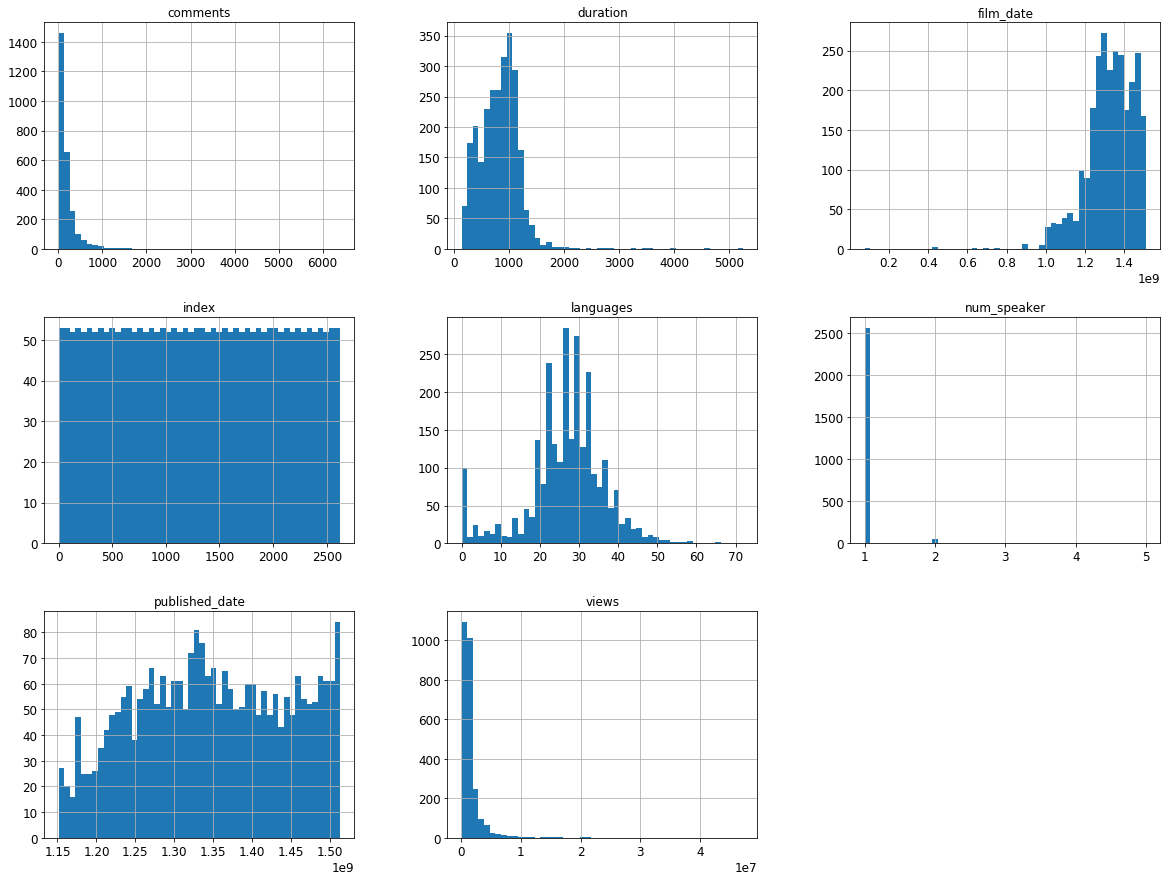

In [11]:
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

## Fill and remove rows with missing data

In [12]:
def fill_null_occupations():
    df['speaker_occupation'].fillna('No Occupation Noted', axis=0, inplace=True)

In [13]:
fill_null_occupations()

In [14]:
df[df['speaker_occupation'] == 'No Occupation Noted']

,index,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
1113,1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",No Occupation Noted,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749,Cholera was reported in Haiti for the first ti...
1192,1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",No Occupation Noted,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010,Thank y'all!This is going to be a motivational...
1220,1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",No Occupation Noted,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639,"I don't know why, but I'm continually amazed t..."
1656,1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",No Occupation Noted,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510,(Music) For any of you who have visited or liv...
1911,1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",No Occupation Noted,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937,I'm an artist and I cut books. This is one of ...
1949,1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",No Occupation Noted,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431,"People back home call me a heckler, a troublem..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 19 columns):
index                 2628 non-null int64
comments              2628 non-null int64
description           2628 non-null object
duration              2628 non-null int64
event                 2628 non-null object
film_date             2628 non-null int64
languages             2628 non-null int64
main_speaker          2628 non-null object
name                  2628 non-null object
num_speaker           2628 non-null int64
published_date        2628 non-null int64
ratings               2628 non-null object
related_talks         2628 non-null object
speaker_occupation    2628 non-null object
tags                  2628 non-null object
title                 2628 non-null object
url                   2628 non-null object
views                 2628 non-null int64
transcript            2542 non-null object
dtypes: int64(8), object(11)
memory usage: 390.2+ KB


In [16]:
def remove_multiple_speakers():
    return df[df['num_speaker'] == 1]

In [17]:
df = remove_multiple_speakers()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2562 entries, 0 to 2627
Data columns (total 19 columns):
index                 2562 non-null int64
comments              2562 non-null int64
description           2562 non-null object
duration              2562 non-null int64
event                 2562 non-null object
film_date             2562 non-null int64
languages             2562 non-null int64
main_speaker          2562 non-null object
name                  2562 non-null object
num_speaker           2562 non-null int64
published_date        2562 non-null int64
ratings               2562 non-null object
related_talks         2562 non-null object
speaker_occupation    2562 non-null object
tags                  2562 non-null object
title                 2562 non-null object
url                   2562 non-null object
views                 2562 non-null int64
transcript            2479 non-null object
dtypes: int64(8), object(11)
memory usage: 400.3+ KB


In [19]:
def drop_no_transcript():
    return df.dropna(axis=0)

In [20]:
df = drop_no_transcript()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 2627
Data columns (total 19 columns):
index                 2479 non-null int64
comments              2479 non-null int64
description           2479 non-null object
duration              2479 non-null int64
event                 2479 non-null object
film_date             2479 non-null int64
languages             2479 non-null int64
main_speaker          2479 non-null object
name                  2479 non-null object
num_speaker           2479 non-null int64
published_date        2479 non-null int64
ratings               2479 non-null object
related_talks         2479 non-null object
speaker_occupation    2479 non-null object
tags                  2479 non-null object
title                 2479 non-null object
url                   2479 non-null object
views                 2479 non-null int64
transcript            2479 non-null object
dtypes: int64(8), object(11)
memory usage: 387.3+ KB


## Remove Q and A session from the end of many talks

In [22]:
def trim_q_and_a(x, pattern, offset):
    trim_index = x.find(pattern, 400)
    if trim_index == -1:
        return x
    return x[:trim_index+offset]

In [24]:
df['transcript'] = df['transcript'].apply(trim_q_and_a, args=('(Applause)Chris Anderson:', 10))
df['transcript'] = df['transcript'].apply(trim_q_and_a, args=('(Applause) Chris Anderson:', 10))

In [29]:
df['transcript'].tail()

2623     It was the end of October in the mountains in...
2624     Today, more than half of the world's populati...
2625     We live in a time of fear, and our response t...
2626     Back home, my friends call me nicknames, such...
2627     So, I teach college students about inequality...
Name: transcript, dtype: object

At this point, I searched for the text "Chris Anderson" in the transcripts, and I found many in which he was conversing with the speaker. I went through a manually removed his comments from the text.

I also noticed a few more conversations in the transcripts that had not been noted in the "num_speaker" attribute from the TED.com website. So I also created a new column for "conversation" when more than one person is speaking onstage during the talk.

I also created a new column named "music" when a music performance was the focus of the talk.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 2627
Data columns (total 19 columns):
index                 2479 non-null int64
comments              2479 non-null int64
description           2479 non-null object
duration              2479 non-null int64
event                 2479 non-null object
film_date             2479 non-null int64
languages             2479 non-null int64
main_speaker          2479 non-null object
name                  2479 non-null object
num_speaker           2479 non-null int64
published_date        2479 non-null int64
ratings               2479 non-null object
related_talks         2479 non-null object
speaker_occupation    2479 non-null object
tags                  2479 non-null object
title                 2479 non-null object
url                   2479 non-null object
views                 2479 non-null int64
transcript            2479 non-null object
dtypes: int64(8), object(11)
memory usage: 467.3+ KB


In [33]:
df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_transcript_edited.xls"), encoding="ISO-8859-1")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 2627
Data columns (total 20 columns):
index                 2479 non-null int64
comments              2479 non-null int64
description           2479 non-null object
duration              2479 non-null int64
event                 2479 non-null object
film_date             2479 non-null int64
languages             2479 non-null int64
main_speaker          2479 non-null object
name                  2479 non-null object
published_date        2479 non-null int64
ratings               2479 non-null object
related_talks         2479 non-null object
speaker_occupation    2479 non-null object
tags                  2479 non-null object
title                 2479 non-null object
url                   2479 non-null object
views                 2479 non-null int64
music                 2479 non-null int64
conversation          2479 non-null int64
transcript            2479 non-null object
dtypes: int64(9), object(11)
memory usage:

## Create 'persuasive' column by parsing ratings

In [41]:
import ast

def parse_ratings(x, label):
    x = ast.literal_eval(x)
    for row in x:
        if row['name'] == label:
            return int(row['count'])
    else:
        return 0


def count_reaction(x, term):
    return x.count(term)

def create_new_columns():
    # Create columns from ratings
    df['persuasive'] = df['ratings'].apply(parse_ratings, args=('Persuasive',))
    df['inspiring'] = df['ratings'].apply(parse_ratings, args=('Inspiring',))
    df['unconvincing'] = df['ratings'].apply(parse_ratings, args=('Unconvincing',))
    df['applause'] = df['transcript'].apply(count_audience_reaction, args=('(Applause)',))
    df['laughter'] = df['transcript'].apply(count_audience_reaction, args=('(Laughter)',))
    return df

In [43]:
import re
df = create_new_columns()

In [44]:
df.describe()

,index,comments,duration,film_date,languages,num_speaker,published_date,views,persuasive,inspiring,unconvincing,applause,laughter
count,2479.000000,2479.000000,2479.000000,2.479000e+03,2479.000000,2479.0,2.479000e+03,2.479000e+03,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,1319.556273,188.771682,817.444534,1.329130e+09,27.841065,1.0,1.349147e+09,1.723140e+06,221.384026,526.425171,52.604276,0.037919,0.173457
std,760.648472,284.061960,324.755499,1.173746e+08,8.677743,0.0,9.766767e+07,2.512115e+06,469.180951,1286.633873,92.623921,0.218620,0.647031
min,0.000000,2.000000,135.000000,4.445280e+08,1.000000,1.0,1.151367e+09,1.468390e+05,0.000000,5.000000,0.000000,0.000000,0.000000
25%,658.500000,59.000000,582.500000,1.265198e+09,23.000000,1.0,1.270680e+09,7.898545e+05,39.000000,113.000000,11.000000,0.000000,0.000000
50%,1344.000000,114.000000,848.000000,1.340323e+09,28.000000,1.0,1.348927e+09,1.139068e+06,97.000000,234.000000,27.000000,0.000000,0.000000
75%,1977.500000,218.500000,1042.000000,1.426464e+09,33.000000,1.0,1.431832e+09,1.705417e+06,226.500000,496.500000,59.000000,0.000000,0.000000
max,2627.000000,6404.000000,2678.000000,1.512864e+09,72.000000,1.0,1.513004e+09,4.722711e+07,10704.000000,24924.000000,2194.000000,3.000000,8.000000
